In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import IPython.display as IPd
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from sbi.utils import BoxUniform
import numpy as np

import torch
from torch import ones, zeros, eye
from svgutils.compose import *
import svgutils.transform as sg

import matplotlib.font_manager
font_files = matplotlib.font_manager.findSystemFonts(fontpaths=['../../fonts/'], fontext='ttf')
matplotlib.font_manager.fontManager.addfont(font_files[0])

# specify matplotlib rc file
plt.style.use('../../../.matplotlibrc')
mpl.rcParams['font.family'] = 'Arial'

/home/macke/rgao97/.conda/envs/gbi/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
PANEL_A = "../svg/panel_a.svg"
PANEL_B = "../svg/panel_b.svg"
PANEL_C = "../svg/panel_c.svg"
PANEL_D = "../svg/panel_d.svg"
PANEL_E = "../svg/panel_e.svg"
PANEL_F = "../svg/panel_f.svg"
PANEL_G = "../svg/panel_g.svg"
PANEL_H = "../svg/panel_h.svg"
PANEL_I = "../svg/panel_i.svg"

In [4]:
_ = torch.manual_seed(0)

In [5]:
size = 1

In [6]:
prior = BoxUniform(-2.8*ones(1), 2.8*ones(1))
theta = prior.sample((100,))
x = ((theta**2 - 2)**2 + 1 * torch.randn(theta.shape)+ 5.0) / 30 

xo1 = 0.5*ones(1)
xo2 = -0.1*ones(1)

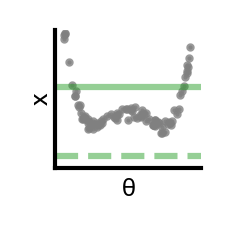

In [22]:
# with mpl.rc_context(fname="../../../.matplotlibrc"):
# fig, ax = plt.subplots(1, 1, figsize=(size, size))
size=0.75
fig, ax = plt.subplots(1, 1, figsize=(size, size), dpi=300)
ax.scatter(theta.numpy(), x.numpy(), s=1, alpha=0.8, color='gray')
ax.set_ylim([0, 1])
ax.axhline(xo1.numpy(), color='C3', alpha=0.5)
ax.axhline(xo2.numpy(), color='C3', alpha=0.5, linestyle='--')
ax.set_yticks([-.2, 1])
ax.set_xticks([]);ax.set_yticks([]);
ax.set_xlim([-3, 3])
ax.set_xlabel(r"$\theta$", labelpad=-1)
ax.set_ylabel(r"$x$", labelpad=-3)
plt.tight_layout()
plt.savefig(PANEL_A, facecolor="None", transparent=True)


In [23]:
theta_lin = torch.linspace(-2.8, 2.8, 100).unsqueeze(0).repeat(1000, 1)
x_lin1 = ((theta_lin**2 - 2)**2 + 1 * torch.randn(theta_lin.shape)+ 5.0) / 30 
d_lin1 = ((x_lin1 - xo1)**2).mean(dim=0)
d_lin2 = ((x_lin1 - xo2)**2).mean(dim=0)

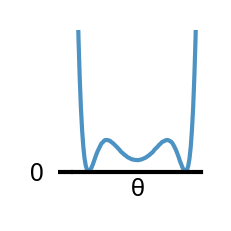

In [50]:
# with mpl.rc_context(fname="../../../.matplotlibrc"):
#     fig, ax = plt.subplots(1, 1, figsize=(size, size))
fig, ax = plt.subplots(1, 1, figsize=(size,size), dpi=300)
ax.plot(theta_lin.numpy()[0], d_lin1.numpy(), color='C1', alpha=0.8, lw=1)
# ax.plot(theta_lin.numpy()[0], d_lin2.numpy(), color='C4', alpha=0.8, ls='--', dashes=(1, 1),lw=1)
ax.set_ylim([0, 0.5])
ax.set_yticks([0])
ax.set_xticks([])
ax.set_xlim([-3, 3])
ax.set_xlabel(r"$\theta$", labelpad=-2)
ax.spines["left"].set_visible(False)
plt.savefig(PANEL_B, facecolor="None", transparent=True)
plt.tight_layout()

In [51]:
# with mpl.rc_context(fname="../../../.matplotlibrc"):
#     fig, ax = plt.subplots(1, 1, figsize=(size, size))
fig, ax = plt.subplots(1, 1, figsize=(size,size), dpi=300)
ax.plot(theta_lin.numpy()[0], d_lin2.numpy(), color='C1', alpha=0.8, ls='--', dashes=(1, 1),lw=1)
ax.set_ylim([0, 0.5])
ax.set_yticks([0])
ax.set_xticks([])
ax.set_xlim([-3, 3])
ax.set_xlabel(r"$\theta$", labelpad=-2)
ax.spines["left"].set_visible(False)
plt.savefig(PANEL_C, facecolor="None", transparent=True)
plt.tight_layout()

In [35]:
cols = [
    "#eff3ff",
    "#c6dbef",
    "#9ecae1",
    "#6baed6",
    "#3182bd",
    "#08519c",
]

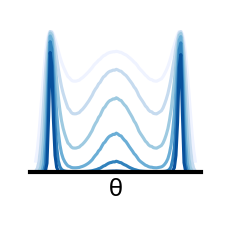

In [44]:
# with mpl.rc_context(fname="../../../.matplotlibrc"):
fig, ax = plt.subplots(1, 1, figsize=(size,size), dpi=300)
for i, beta in enumerate([4.0, 8.0, 16.0, 32.0, 64.0, 128.0]):
    ax.plot(theta_lin.numpy()[0], np.exp(-beta * d_lin1.numpy()), c=cols[i], lw=.75)
ax.set_ylim([0, 1.0])
ax.set_yticks([0, 1])
ax.set_xticks([])
ax.set_xlim([-3, 3])
ax.set_xlabel(r"$\theta$", labelpad=-2) 
# ax.set_title(r"$\exp(-\beta \cdot f(\theta; x_o))$")
ax.set_yticks([])
ax.spines["left"].set_visible(False)
plt.savefig(PANEL_D, facecolor="None", transparent=True)
plt.tight_layout()

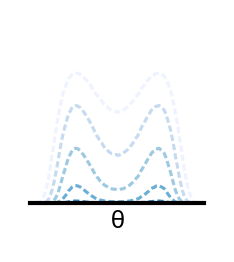

In [49]:
# with mpl.rc_context(fname="../../../.matplotlibrc"):
fig, ax = plt.subplots(1, 1, figsize=(size,size), dpi=300)
for i, beta in enumerate([4.0, 8.0, 16.0, 32.0, 64.0, 128.0]):
    ax.plot(theta_lin.numpy()[0], np.exp(-beta * d_lin2.numpy()), c=cols[i], lw=.75, dashes=(2, 1))
ax.set_ylim([0, 1.0])
ax.set_yticks([0, 1])
ax.set_xticks([])
ax.set_xlim([-3, 3])
ax.set_xlabel(r"$\theta$", labelpad=-2) 
# ax.set_title(r"$\exp(-\beta \cdot f(\theta; x_o))$")
ax.set_yticks([])
ax.spines["left"].set_visible(False)
plt.savefig(PANEL_E, facecolor="None", transparent=True)
plt.tight_layout()

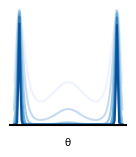

In [79]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(size, size))
    for i, beta in enumerate([4.0, 8.0, 16.0, 32.0, 64.0, 128.0]):
        ax.plot(theta_lin.numpy()[0], np.exp(-beta * d_lin2.numpy()), c=cols[i])
    ax.set_ylim([0, 1.0])
    ax.set_yticks([0, 1])
    ax.set_xticks([])
    ax.set_xlim([-3, 3])
    ax.set_xlabel(r"$\theta$")
    ax.set_yticks([])
    ax.spines["left"].set_visible(False)
    plt.savefig(PANEL_E, facecolor="None", transparent=True)
    plt.show()

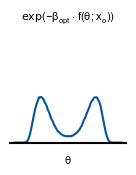

In [80]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(size, size))
    beta_opt1 = 32.0
    ax.plot(theta_lin.numpy()[0], np.exp(-beta_opt1 * d_lin1.numpy()), c=cols[i])
    ax.set_ylim([0, 1.0])
    ax.set_yticks([0, 1])
    ax.set_xticks([])
    ax.set_xlim([-3, 3])
    ax.set_xlabel(r"$\theta$")
    ax.set_title(r"$\exp(-\beta_{opt} \cdot f(\theta; x_o))$")
    ax.set_yticks([])
    ax.spines["left"].set_visible(False)
    plt.savefig(PANEL_F, facecolor="None", transparent=True)
    plt.show()

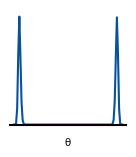

In [81]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(size, size))
    beta_opt2 = 64.0
    ax.plot(theta_lin.numpy()[0], np.exp(-beta_opt2 * d_lin2.numpy()), c=cols[i])
    ax.set_ylim([0, 1.0])
    ax.set_yticks([0, 1])
    ax.set_xticks([])
    ax.set_xlim([-3, 3])
    ax.set_yticks([])
    ax.spines["left"].set_visible(False)
    ax.set_xlabel(r"$\theta$")
    plt.savefig(PANEL_G, facecolor="None", transparent=True)
    plt.show()

In [82]:
proposal_samples = prior.sample((10_000,)).repeat(1, 1000).T
x_lin_prop = ((proposal_samples**2 - 2)**2 + 1 * torch.randn(proposal_samples.shape)+ 5.0) / 30 
d_lin_prop = ((x_lin_prop - xo1)**2).mean(dim=0)
cost = np.exp(-beta_opt1 * d_lin_prop.numpy())
max_cost = np.max(cost)
rands = torch.rand((10_000,)).numpy()
fun = (cost / max_cost)
accepted = fun > rands
samples = proposal_samples[0, accepted]

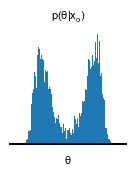

In [83]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(size, size))
    ax.hist(samples.numpy(), bins=100)
    ax.set_yticks([])
    ax.spines["left"].set_visible(False)
    ax.set_xlabel(r"$\theta$")
    ax.set_title(r"$p(\theta | x_o)$")
    ax.set_xlim([-3, 3])
    ax.set_xticks([])
    plt.savefig(PANEL_H, facecolor="None", transparent=True)
    plt.show()

In [84]:
proposal_samples = prior.sample((10_000,)).repeat(1, 1000).T
x_lin_prop = ((proposal_samples**2 - 2)**2 + 1 * torch.randn(proposal_samples.shape)+ 5.0) / 30 
d_lin_prop = ((x_lin_prop - xo2)**2).mean(dim=0)
cost = np.exp(-beta_opt2 * d_lin_prop.numpy())
max_cost = np.max(cost)
rands = torch.rand((10_000,)).numpy()
fun = (cost / max_cost)
accepted = fun > rands
samples = proposal_samples[0, accepted]

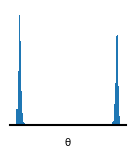

In [85]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(size, size))
    ax.hist(samples.numpy(), bins=100)
    ax.set_yticks([])
    ax.spines["left"].set_visible(False)
    ax.set_xlabel(r"$\theta$")
    ax.set_xlim([-3, 3])
    ax.set_xticks([])
    plt.savefig(PANEL_I, facecolor="None", transparent=True)
    plt.show()

In [86]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [94]:
# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("20.3cm", "6.2cm",

    Panel(
          SVG(PANEL_A).move(0, 0),
    ).move(0, 60),
    Panel(
          SVG("../svg/fig1.svg").move(0, 0),
    ).move(150, 60),
    Panel(
          SVG(PANEL_B).move(0, 0),
    ).move(280, 0),
    Panel(
          SVG(PANEL_C).move(0, 0),
    ).move(280, 120),
    Panel(
          SVG(PANEL_D).move(0, 0),
    ).move(400, 0),
    Panel(
          SVG(PANEL_E).move(0, 0),
    ).move(400, 120),
    Panel(
          SVG(PANEL_F).move(0, 0),
    ).move(520, 0),
    Panel(
          SVG(PANEL_G).move(0, 0),
    ).move(520, 120),
    Panel(
          SVG(PANEL_H).move(0, 0),
    ).move(640, 0),
    Panel(
          SVG(PANEL_I).move(0, 0),
    ).move(640, 120),
)

f.save("../fig/fig1.svg")
svg('../fig/fig1.svg')